In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

pd. set_option("display.max_columns", None)
np.set_printoptions(linewidth=150)

# Dataset

password = ".tie5Roanl"

    H.char -> Hold time
    DD.char1.char2 -> Time from when char1 was pressed to when char2 was pressed
    UD.char1.char2 -> Time from when char1 was released to when char2 was pressed

In [2]:
original_data = pd.read_csv("DSL-StrongPasswordData.csv")
data = original_data.drop(["sessionIndex","rep"],axis=1)

data

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,0.0757,-0.0188,0.1328,0.0826,-0.0502,0.1000,0.2398,0.1398,0.0863,0.2148,0.1285,0.0944,0.2066,0.1122,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,0.0636,-0.0280,0.1256,0.0852,-0.0404,0.0987,0.2441,0.1454,0.0892,0.1209,0.0317,0.0776,0.0977,0.0201,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,0.0462,-0.0259,0.0903,0.2045,0.1142,0.0733,0.2190,0.1457,0.0742,0.1700,0.0958,0.0599,0.1104,0.0505,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,0.0897,-0.0095,0.1016,0.0570,-0.0446,0.0820,0.2881,0.2061,0.0729,0.1602,0.0873,0.0728,0.1111,0.0383,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:],data["subject"],
                                                    stratify = data["subject"],
                                                    test_size=0.25)
X_train 

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
19177,0.0683,0.2360,0.1677,0.0765,0.1111,0.0346,0.0665,0.0818,0.0153,0.1042,0.2424,0.1382,0.0823,0.3352,0.2529,0.0876,0.1132,0.0256,0.0997,0.1481,0.0484,0.0987,0.1101,0.0114,0.0902,0.0617,-0.0285,0.0926,0.2378,0.1452,0.0799
20291,0.0802,0.0764,-0.0038,0.0726,0.0985,0.0259,0.0596,0.0488,-0.0108,0.0820,0.1326,0.0506,0.0765,0.2089,0.1324,0.0803,0.1418,0.0615,0.0791,0.0979,0.0188,0.0900,0.0922,0.0022,0.0755,0.0744,-0.0011,0.1366,0.2533,0.1167,0.0934
5491,0.0800,0.0762,-0.0038,0.0866,0.1640,0.0774,0.0769,0.0449,-0.0320,0.0632,0.2893,0.2261,0.1291,0.3058,0.1767,0.1154,0.2107,0.0953,0.0850,0.1746,0.0896,0.1270,0.1046,-0.0224,0.1373,0.0668,-0.0705,0.1457,0.2881,0.1424,0.0760
8518,0.0911,0.3314,0.2403,0.0533,0.1995,0.1462,0.0927,0.0943,0.0016,0.0895,0.5874,0.4979,0.0702,0.3904,0.3202,0.0837,0.1822,0.0985,0.1231,0.0962,-0.0269,0.1075,0.1387,0.0312,0.0979,0.1523,0.0544,0.1272,0.3915,0.2643,0.0927
18656,0.0723,0.1479,0.0756,0.0546,0.0894,0.0348,0.0799,0.0551,-0.0248,0.0441,0.1506,0.1065,0.0657,0.9673,0.9016,0.0375,0.2760,0.2385,0.0842,0.0766,-0.0076,0.1183,0.0948,-0.0235,0.1012,0.0721,-0.0291,0.0858,0.1827,0.0969,0.0731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,0.1093,0.1776,0.0683,0.0810,0.2388,0.1578,0.0721,0.1460,0.0739,0.0869,0.6754,0.5885,0.0839,0.3809,0.2970,0.0840,0.1825,0.0985,0.0760,0.1159,0.0399,0.1001,0.0964,-0.0037,0.0927,0.1682,0.0755,0.1024,0.5572,0.4548,0.0921
14464,0.0979,0.3265,0.2286,0.0686,0.1559,0.0873,0.0617,0.1780,0.1163,0.0876,0.3555,0.2679,0.0660,0.4514,0.3854,0.0723,0.1831,0.1108,0.0639,0.1494,0.0855,0.0575,0.2015,0.1440,0.1303,0.1445,0.0142,0.1274,0.3253,0.1979,0.1274
7461,0.0140,0.0986,0.0846,0.0568,0.2291,0.1723,0.0826,0.5444,0.4618,0.0404,0.6848,0.6444,0.0380,0.4049,0.3669,0.0547,0.2778,0.2231,0.0483,0.1777,0.1294,0.0737,0.0867,0.0130,0.0504,0.2071,0.1567,0.0700,0.2161,0.1461,0.0679
18412,0.1419,0.2711,0.1292,0.0551,0.0860,0.0309,0.0856,0.0784,-0.0072,0.0745,1.0682,0.9937,0.0591,0.6457,0.5866,0.0544,0.2209,0.1665,0.0921,0.1373,0.0452,0.1082,0.0839,-0.0243,0.0903,0.0581,-0.0322,0.1137,0.4021,0.2884,0.0620


In [4]:
train_dataset = X_train.copy()
train_dataset["subject"] = y_train

train_dataset.sort_values("subject",axis=0,inplace=True)
train_dataset.reset_index(drop=True,inplace=True)

test_dataset = pd.concat([y_test,X_test],axis=1)
test_dataset = test_dataset.reset_index(drop=True)

## Feature variance

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
variance,0.000875,0.050752,0.053632,0.000755,0.013373,0.013900,0.000724,0.061191,0.061940,0.000937,0.072728,0.073591,0.000476,0.066105,0.066359,0.001145,0.030806,0.033243,0.000704,0.011916,0.012352,0.001553,0.011945,0.011476,0.000943,0.021848,0.024761,0.000802,0.048008,0.050455,0.000754
variance ratio,0.001093,0.063437,0.067036,0.000943,0.016715,0.017374,0.000905,0.076485,0.077421,0.001171,0.090905,0.091983,0.000595,0.082627,0.082944,0.001431,0.038505,0.041551,0.000879,0.014894,0.015439,0.001941,0.014931,0.014344,0.001178,0.027308,0.030949,0.001002,0.060006,0.063066,0.000943


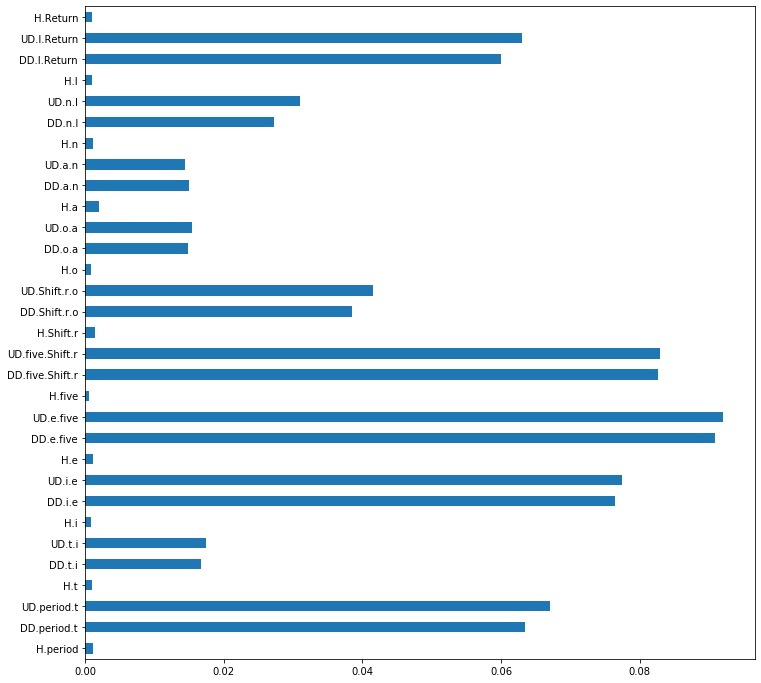

In [5]:
from sklearn.feature_selection import VarianceThreshold

variance_threshold = VarianceThreshold()
variance_threshold.fit(X_train)

variance = variance_threshold.variances_

feature_variance = pd.DataFrame([variance],columns=X_train.columns,index=["variance"])
feature_variance.loc["variance ratio"] = feature_variance.loc["variance"] / feature_variance.loc["variance"].sum()

feature_variance.loc["variance ratio"].plot(kind="barh",figsize=(12,12))
feature_variance

# Autoencoder

In [6]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit


class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            keras.layers.Dense(128, activation="tanh"),
            keras.layers.Dense(64, activation="tanh"),
            keras.layers.Dense(32, activation="tanh"),
            keras.layers.Dense(16, activation="tanh")])

        self.decoder = tf.keras.Sequential([
            keras.layers.Dense(32, activation="tanh"),
            keras.layers.Dense(64, activation="tanh"),
            keras.layers.Dense(128, activation="tanh"),
            keras.layers.Dense(31, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def train_autoencoder(train_data,validation_data,epochs=50,batch_size=16):

    autoencoder = AnomalyDetector()

    autoencoder.compile(optimizer="adam", loss="mae")

    history = autoencoder.fit(train_data,train_data,
                             epochs=epochs,
                             batch_size=batch_size,
                             shuffle=True,
                             verbose = 0,
                             validation_data=(validation_data, validation_data))

    return autoencoder, history

def show_history(history):
    fig1, ax1 = plt.subplots()
    ax1.plot(history.history["loss"], label="Training Loss")
    ax1.plot(history.history["val_loss"], label="Validation Loss")
    ax1.legend()
    plt.show()

def calculate_rec_loss(autoencoder, data):
    reconstructions = autoencoder.predict(data)
    train_loss = tf.keras.losses.mae(reconstructions, data)
    return train_loss

def show_distributions(normal_loss,anomal_loss, title="Figure"):
    fig1, ax1 = plt.subplots()
    ax1.hist(normal_loss[None,:], bins=60,alpha=0.5,label="Normal data",range=(0,0.5))
    ax1.hist(anomal_loss[None,:], bins=60,alpha=0.5,label="Anomal data",range=(0,0.5))
    ax1.set_xlabel("Reconstruction errors")
    ax1.set_ylabel("Number of examples")
    ax1.set_title(title)
    ax1.legend()
    plt.show()

def predict(model, data, threshold):
    reconstructions = model.predict(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def specificity(labels,preds):
    tn, fp, fn, tp = confusion_matrix(labels,preds).ravel()
    return tn / (tn+fp)

def calculate_stats(preds, labels):
    acc = accuracy_score(labels, preds)
    spec = specificity(labels, preds)
    recall = recall_score(labels, preds)
    
    return acc,spec,recall

def find_threshold(normal_loss,anomal_loss):

    best_threshold = 0
    best_difference = 1
    counter = 0
    for threshold in np.linspace(0,0.3,150):
        normal_percentage = tf.math.less(normal_loss, threshold).numpy().sum() / normal_loss.shape[0]
        anomal_percentage = tf.math.greater(anomal_loss, threshold).numpy().sum() / anomal_loss.shape[0]
        difference = abs(normal_percentage - anomal_percentage)
        if difference < best_difference:
            best_difference = difference
            best_threshold = threshold
            counter = 0
        else:
            counter += 1
            if counter >= 25:
                break
            
    return best_threshold

In [7]:
ivan = pd.read_csv("prepared_data_IVAN.csv")
luka = pd.read_csv("prepared_data_luka.csv")
my_data = pd.read_csv("prepared_data_s060.csv")
extended_dataset = pd.concat([luka,my_data,ivan,train_dataset],ignore_index = True, sort = False)

extended_dataset

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,luka,0.085790,0.327150,0.241360,0.092807,0.130664,0.037858,0.076752,0.233332,0.156580,0.082903,0.496712,0.413809,0.070803,0.397042,0.326238,0.062821,0.442322,0.379501,0.104730,0.187493,0.082763,0.121674,0.143622,0.021947,0.087760,0.195476,0.107716,0.076290,0.542604,0.466314,0.079781
1,luka,0.069516,0.556220,0.486704,0.096733,0.128646,0.031914,0.067819,0.214426,0.146607,0.102726,0.429498,0.326772,0.067838,0.449022,0.381184,0.061830,0.469747,0.407917,0.091750,0.167551,0.075801,0.114699,0.197473,0.082774,0.090755,0.243050,0.152295,0.071886,0.299414,0.227529,0.072694
2,luka,0.066813,1.185067,1.118254,0.084151,0.131771,0.047620,0.069806,0.219821,0.150015,0.076790,0.516469,0.439679,0.069888,0.561502,0.491614,0.062833,0.448799,0.385967,0.077790,0.204449,0.126659,0.117689,0.204509,0.086820,0.082727,0.279620,0.196893,0.081864,0.358322,0.276458,0.105725
3,luka,0.072911,0.583435,0.510524,0.088775,0.213164,0.124390,0.066812,0.293272,0.226460,0.078144,0.430092,0.351948,0.077298,0.798378,0.721081,0.066950,0.529245,0.462295,0.092784,0.158798,0.066013,0.112121,0.179016,0.066895,0.082740,0.230319,0.147579,0.081814,0.348106,0.266293,0.038850
4,luka,0.087662,0.544449,0.456787,0.101718,0.108724,0.007006,0.083755,0.196453,0.112698,0.101454,0.423626,0.322172,0.081552,0.767237,0.685685,0.092684,0.807774,0.715090,0.081785,0.121706,0.039921,0.118688,0.220431,0.101743,0.088743,0.357144,0.268401,0.085648,0.481591,0.395942,0.108707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15540,s057,0.093900,0.088500,-0.005400,0.091300,0.133800,0.042500,0.084400,0.067500,-0.016900,0.060700,0.145400,0.084700,0.065200,0.263400,0.198200,0.073300,0.162800,0.089500,0.078100,0.099800,0.021700,0.129800,0.098200,-0.031600,0.064100,0.116100,0.052000,0.097300,0.199300,0.102000,0.113700
15541,s057,0.086000,0.141800,0.055800,0.078100,0.102700,0.024600,0.070400,0.718100,0.647700,0.098100,0.268500,0.170400,0.091000,0.366900,0.275900,0.072000,0.238200,0.166200,0.108900,0.175200,0.066300,0.100100,0.080800,-0.019300,0.064700,0.145400,0.080700,0.107900,0.228600,0.120700,0.100500
15542,s057,0.116100,0.181700,0.065600,0.070200,0.083900,0.013700,0.076800,0.075700,-0.001100,0.063400,0.171300,0.107900,0.068900,0.344500,0.275600,0.060200,0.164700,0.104500,0.080200,0.194000,0.113800,0.103100,0.118700,0.015600,0.051500,0.133800,0.082300,0.114200,0.234900,0.120700,0.130600
15543,s057,0.083100,0.086500,0.003400,0.075700,0.127400,0.051700,0.060800,0.048600,-0.012200,0.099800,0.046700,-0.053100,0.108500,0.246500,0.138000,0.086600,0.149700,0.063100,0.060400,0.106100,0.045700,0.097600,0.089700,-0.007900,0.054700,0.038000,-0.016700,0.128200,0.226700,0.098500,0.122400


In [8]:
def compare_subjects(normal_subject_data, anomal_subject_data):
    ss = MinMaxScaler()
    normal_scaled_data = ss.fit_transform(normal_subject_data)
    anomal_scaled_data = ss.transform(anomal_subject_data)
    
    autoencoder, history = train_autoencoder(normal_scaled_data, anomal_scaled_data, epochs=75,batch_size=16)
    
    normal_loss = calculate_rec_loss(autoencoder,normal_scaled_data)
    anomal_loss = calculate_rec_loss(autoencoder,anomal_scaled_data)

    best_threshold = find_threshold(normal_loss,anomal_loss)
    
    #show_history(history)
    show_distributions(normal_loss, anomal_loss, title="")
    
    print("Best threshold:",best_threshold)

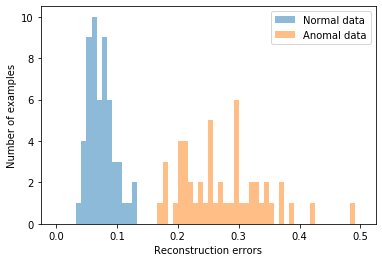

Best threshold: 0.1268456375838926


In [9]:
compare_subjects(ivan.drop("subject",axis=1),luka.drop("subject",axis=1))

## Training

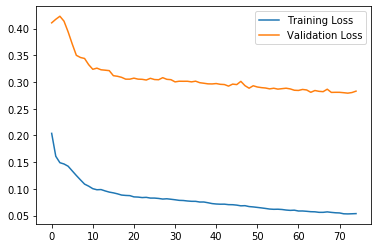

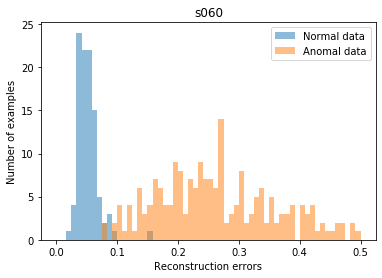

Accuracy = 0.9885386819484241
Specificity(True negative rate) = 0.9879518072289156
Recall(True positive rate) = 0.99
Best threshold: 0.09865771812080536
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: subjects\s060\autoencoder\assets


In [10]:
import os
import pickle

class Subject():
    def __init__(self, name, autoencoder=None, best_threshold=0, scaler=None):
        self.name = name
        self.autoencoder = autoencoder
        self.best_threshold = best_threshold
        self.scaler = scaler
        
    def save_subject(self):
        path = os.path.join("subjects",self.name)
        if not os.path.exists(path):
            os.makedirs(path)
        pickle.dump(self.scaler, open(os.path.join(path,"scaler.pickle"),"wb"))
        pickle.dump(self.best_threshold, open(os.path.join(path,"best_threshold.pickle"),"wb"))
        # scaler = load(open('scaler.pickle', 'rb'))
        self.autoencoder.save(os.path.join(path,"autoencoder"))
        #autoencoder = tf.keras.models.load_model("autoencoder") 
        
    def load_subject(self):
        path = os.path.join("subjects",self.name)
        if not os.path.exists(path):
            msg = f"Subject with name \"{self.name}\" does not exist"
            raise NameError(msg)
        self.scaler = pickle.load(open(os.path.join(path,"scaler.pickle"), 'rb'))
        self.best_threshold = pickle.load(open(os.path.join(path,"best_threshold.pickle"), 'rb'))
        self.autoencoder = tf.keras.models.load_model(os.path.join(path,"autoencoder"))
        
        
def train_subject(subject, dataset, train_samples=50, anomal_samples=250, display=False):
    
    PERCENTAGE = anomal_samples / dataset.shape[0]
    
    ss = MinMaxScaler()

    # Data for training the encoder
    normal_data = dataset.loc[dataset["subject"]==subject].sample(train_samples).drop("subject",axis=1)
    normal_scaled_data = ss.fit_transform(normal_data)
    anomal_data = dataset.drop(normal_data.index)

    # Stratified Sampling of 500 anomalies from dataset (10 from each class)
    sss = StratifiedShuffleSplit(n_splits=1, test_size=PERCENTAGE)
    generator = sss.split(anomal_data,anomal_data["subject"])
    _, indices = next(generator)
    anomal_test_data = anomal_data.iloc[indices].drop("subject",axis=1)
    anomal_len = anomal_test_data.shape[0]
    
    # Scaling
    anomal_test_scaled_data = ss.transform(anomal_test_data)
    normal_test_scaled_data = ss.transform(normal_data)

    test_data = pd.concat([normal_data,anomal_test_data],axis=0)
    test_data_scaled = ss.transform(test_data)
    test_data_labels = np.array([True] * train_samples + [False] * anomal_len)
    
    autoencoder, history = train_autoencoder(normal_scaled_data, test_data_scaled, epochs=75,batch_size=16)
    
    normal_loss = calculate_rec_loss(autoencoder,normal_test_scaled_data)
    anomal_loss = calculate_rec_loss(autoencoder,anomal_test_scaled_data)

    best_threshold = find_threshold(normal_loss,anomal_loss)
    
    preds = predict(autoencoder,test_data_scaled,best_threshold)
    acc,spec,recall = calculate_stats(preds,test_data_labels)
    
    if display:
        show_history(history)
        show_distributions(normal_loss, anomal_loss, title=subject)

        print("Accuracy = {}".format(acc))
        print("Specificity(True negative rate) = {}".format(spec))
        print("Recall(True positive rate) = {}".format(recall))

        print("Best threshold:",best_threshold)
    
    subject = Subject(subject,autoencoder,best_threshold,ss)
    subject.save_subject()
    
    return subject
    
test_subject = train_subject("s060",extended_dataset,100,250,display=True)

# Reconstructions

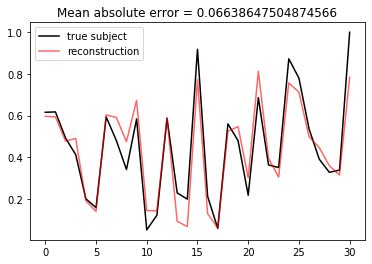

In [11]:
true_instance = my_data.sample(1).drop("subject",axis=1)
scaled_instance = test_subject.scaler.transform(true_instance)
plt.plot(scaled_instance.squeeze(),"black",alpha=1,label="true subject")

reconstruction = test_subject.autoencoder.predict(scaled_instance)
plt.plot(reconstruction.squeeze(),"r",alpha=0.6,label="reconstruction")

plt.legend()
plt.title(f"Mean absolute error = {(abs(reconstruction - scaled_instance)).mean()}")
plt.savefig("subject.png")
plt.show()


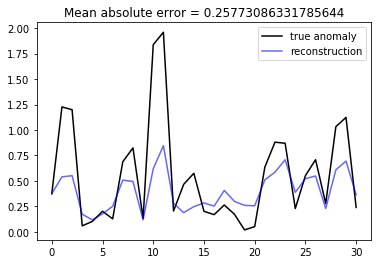

In [12]:
random_instance = train_dataset.sample(1).drop("subject",axis=1)
scaled_instance = test_subject.scaler.transform(random_instance)
plt.plot(scaled_instance.squeeze(),"black",alpha=1,label="true anomaly")

reconstruction = test_subject.autoencoder.predict(scaled_instance)
plt.plot(reconstruction.squeeze(),"blue",alpha=0.6,label="reconstruction")

plt.legend()
plt.title(f"Mean absolute error = {(abs(reconstruction - scaled_instance)).mean()}")
plt.savefig("anomaly.png")
plt.show()


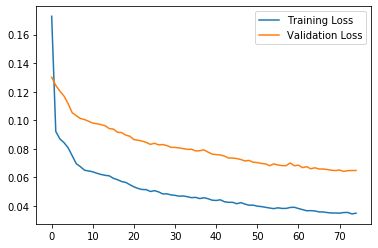

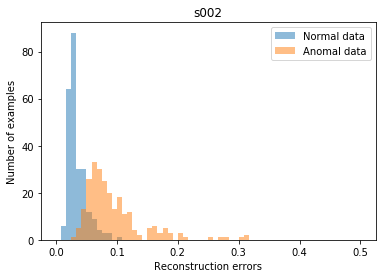

Accuracy = 0.8870967741935484
Specificity(True negative rate) = 0.8861788617886179
Recall(True positive rate) = 0.888
Best threshold: 0.0523489932885906
INFO:tensorflow:Assets written to: subjects\s002\autoencoder\assets


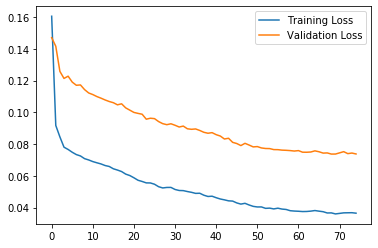

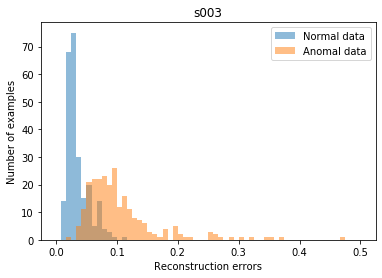

Accuracy = 0.8770161290322581
Specificity(True negative rate) = 0.8780487804878049
Recall(True positive rate) = 0.876
Best threshold: 0.05637583892617449
INFO:tensorflow:Assets written to: subjects\s003\autoencoder\assets


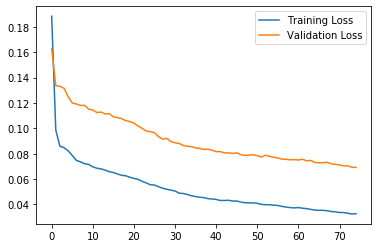

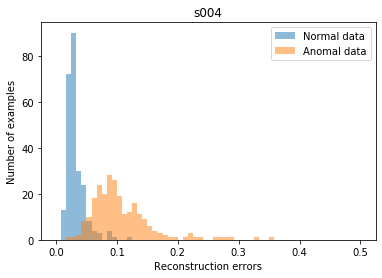

Accuracy = 0.9375
Specificity(True negative rate) = 0.9349593495934959
Recall(True positive rate) = 0.94
Best threshold: 0.054362416107382544
INFO:tensorflow:Assets written to: subjects\s004\autoencoder\assets


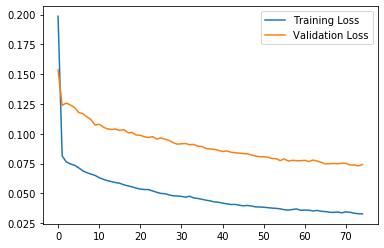

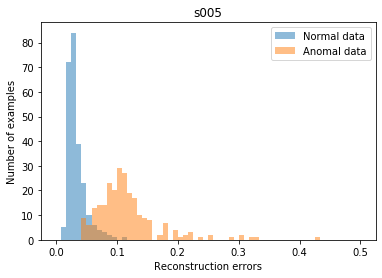

Accuracy = 0.9354838709677419
Specificity(True negative rate) = 0.9390243902439024
Recall(True positive rate) = 0.932
Best threshold: 0.058389261744966434
INFO:tensorflow:Assets written to: subjects\s005\autoencoder\assets


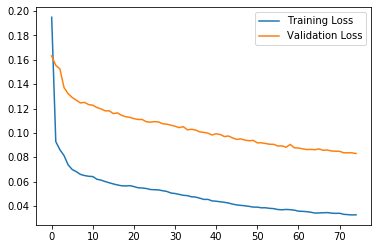

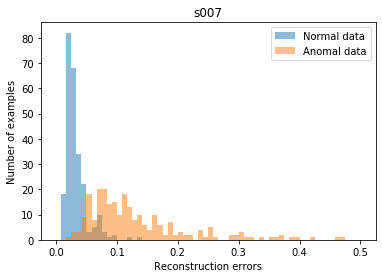

Accuracy = 0.9012096774193549
Specificity(True negative rate) = 0.9024390243902439
Recall(True positive rate) = 0.9
Best threshold: 0.054362416107382544
INFO:tensorflow:Assets written to: subjects\s007\autoencoder\assets


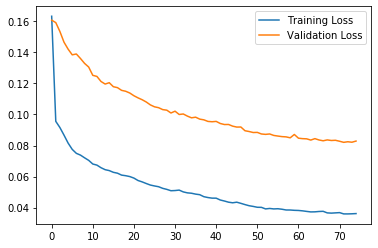

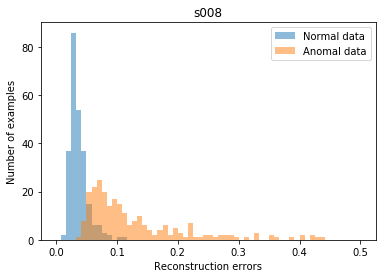

Accuracy = 0.907258064516129
Specificity(True negative rate) = 0.9065040650406504
Recall(True positive rate) = 0.908
Best threshold: 0.05637583892617449
INFO:tensorflow:Assets written to: subjects\s008\autoencoder\assets


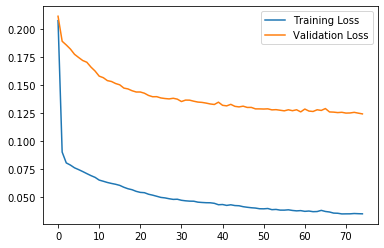

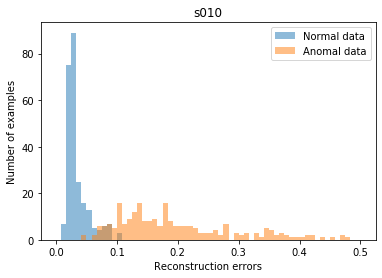

Accuracy = 0.9495967741935484
Specificity(True negative rate) = 0.9512195121951219
Recall(True positive rate) = 0.948
Best threshold: 0.07651006711409396
INFO:tensorflow:Assets written to: subjects\s010\autoencoder\assets


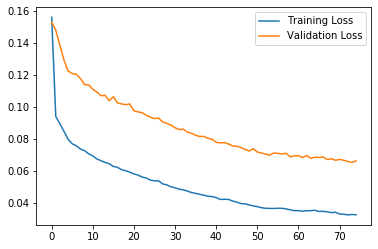

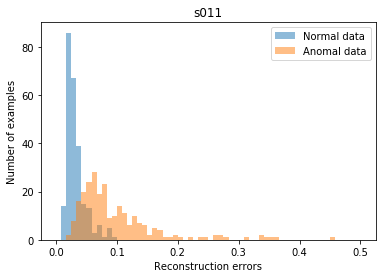

Accuracy = 0.8508064516129032
Specificity(True negative rate) = 0.8495934959349594
Recall(True positive rate) = 0.852
Best threshold: 0.04630872483221476
INFO:tensorflow:Assets written to: subjects\s011\autoencoder\assets


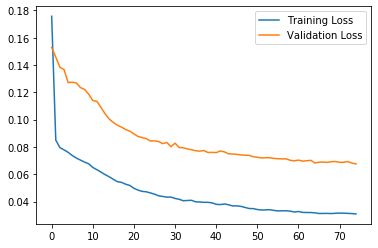

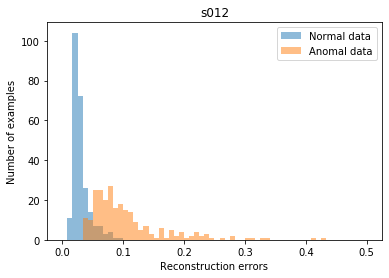

Accuracy = 0.9112903225806451
Specificity(True negative rate) = 0.9146341463414634
Recall(True positive rate) = 0.908
Best threshold: 0.050335570469798654
INFO:tensorflow:Assets written to: subjects\s012\autoencoder\assets


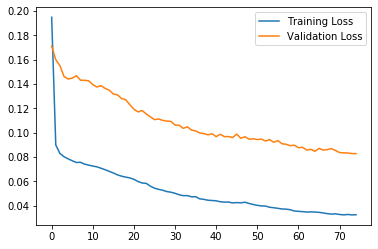

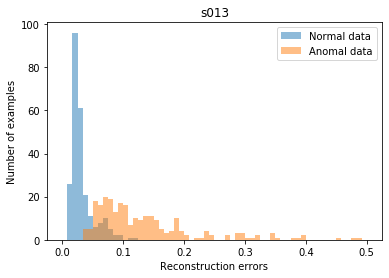

Accuracy = 0.8850806451612904
Specificity(True negative rate) = 0.8861788617886179
Recall(True positive rate) = 0.884
Best threshold: 0.058389261744966434
INFO:tensorflow:Assets written to: subjects\s013\autoencoder\assets


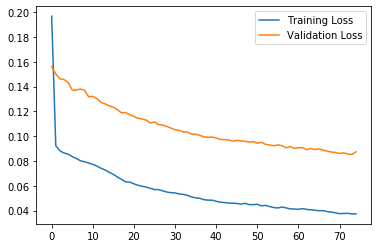

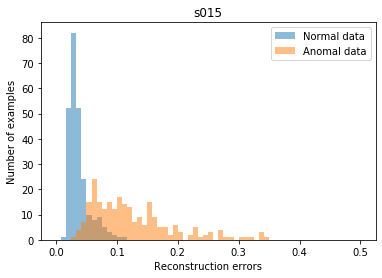

Accuracy = 0.8870967741935484
Specificity(True negative rate) = 0.8902439024390244
Recall(True positive rate) = 0.884
Best threshold: 0.058389261744966434
INFO:tensorflow:Assets written to: subjects\s015\autoencoder\assets


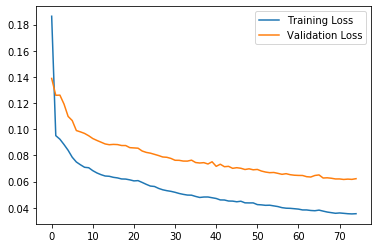

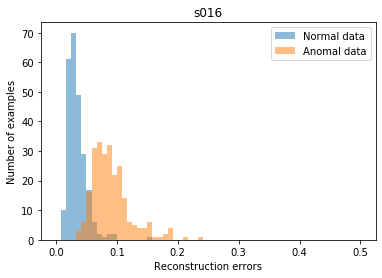

Accuracy = 0.9274193548387096
Specificity(True negative rate) = 0.9308943089430894
Recall(True positive rate) = 0.924
Best threshold: 0.054362416107382544
INFO:tensorflow:Assets written to: subjects\s016\autoencoder\assets


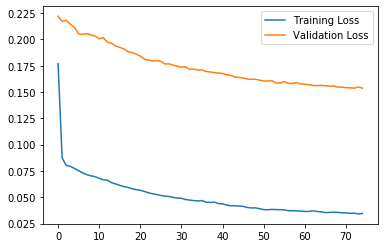

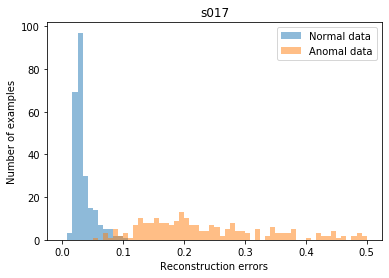

Accuracy = 0.9798387096774194
Specificity(True negative rate) = 0.9796747967479674
Recall(True positive rate) = 0.98
Best threshold: 0.08456375838926174
INFO:tensorflow:Assets written to: subjects\s017\autoencoder\assets


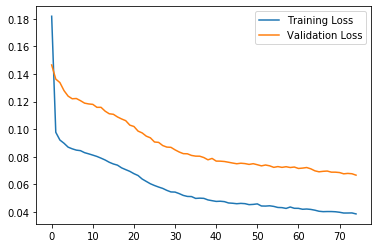

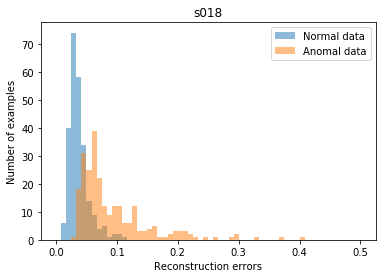

Accuracy = 0.8366935483870968
Specificity(True negative rate) = 0.8373983739837398
Recall(True positive rate) = 0.836
Best threshold: 0.0483221476510067
INFO:tensorflow:Assets written to: subjects\s018\autoencoder\assets


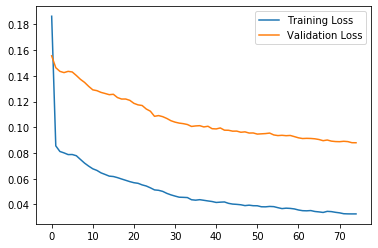

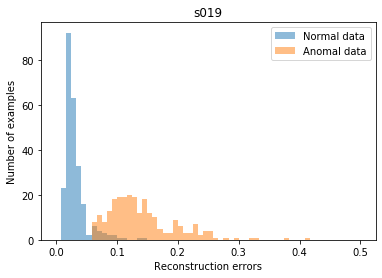

Accuracy = 0.9495967741935484
Specificity(True negative rate) = 0.9471544715447154
Recall(True positive rate) = 0.952
Best threshold: 0.07046979865771812
INFO:tensorflow:Assets written to: subjects\s019\autoencoder\assets


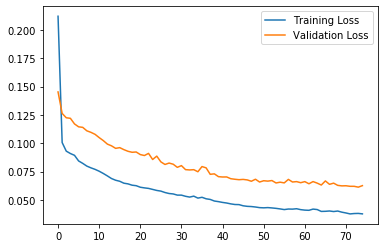

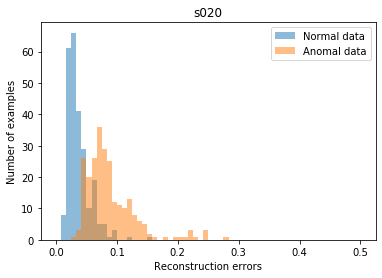

Accuracy = 0.8407258064516129
Specificity(True negative rate) = 0.8414634146341463
Recall(True positive rate) = 0.84
Best threshold: 0.054362416107382544
INFO:tensorflow:Assets written to: subjects\s020\autoencoder\assets


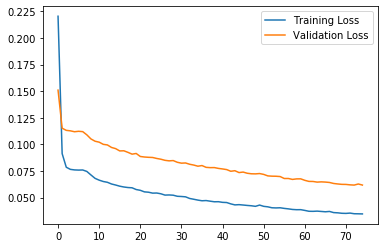

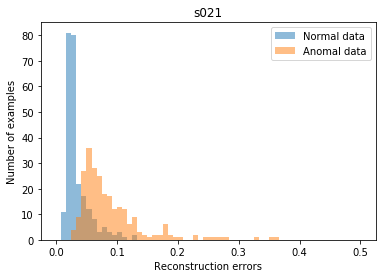

Accuracy = 0.8387096774193549
Specificity(True negative rate) = 0.8333333333333334
Recall(True positive rate) = 0.844
Best threshold: 0.050335570469798654
INFO:tensorflow:Assets written to: subjects\s021\autoencoder\assets


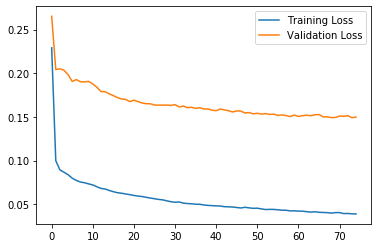

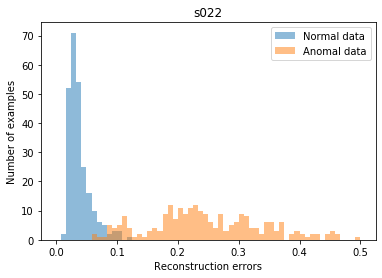

Accuracy = 0.9737903225806451
Specificity(True negative rate) = 0.975609756097561
Recall(True positive rate) = 0.972
Best threshold: 0.08859060402684563
INFO:tensorflow:Assets written to: subjects\s022\autoencoder\assets


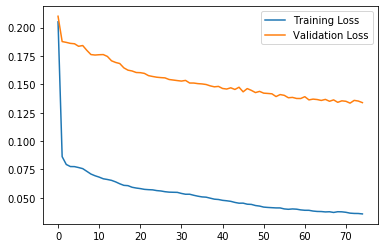

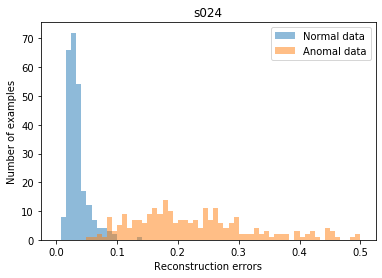

Accuracy = 0.9778225806451613
Specificity(True negative rate) = 0.9796747967479674
Recall(True positive rate) = 0.976
Best threshold: 0.08053691275167785
INFO:tensorflow:Assets written to: subjects\s024\autoencoder\assets


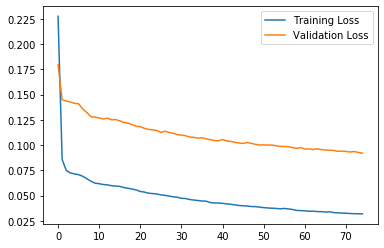

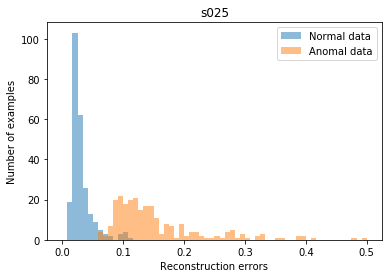

Accuracy = 0.9637096774193549
Specificity(True negative rate) = 0.9634146341463414
Recall(True positive rate) = 0.964
Best threshold: 0.0785234899328859
INFO:tensorflow:Assets written to: subjects\s025\autoencoder\assets


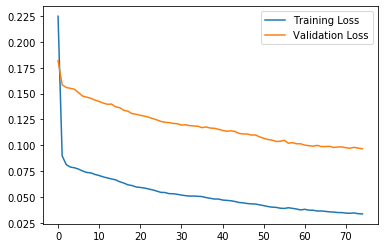

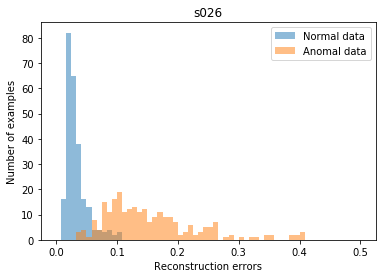

Accuracy = 0.9354838709677419
Specificity(True negative rate) = 0.9349593495934959
Recall(True positive rate) = 0.936
Best threshold: 0.06644295302013423
INFO:tensorflow:Assets written to: subjects\s026\autoencoder\assets


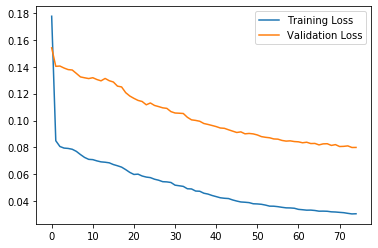

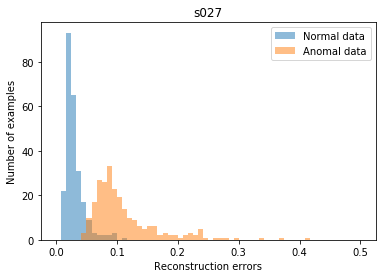

Accuracy = 0.9475806451612904
Specificity(True negative rate) = 0.9471544715447154
Recall(True positive rate) = 0.948
Best threshold: 0.058389261744966434
INFO:tensorflow:Assets written to: subjects\s027\autoencoder\assets


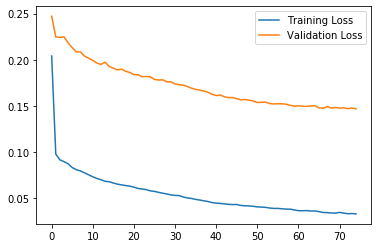

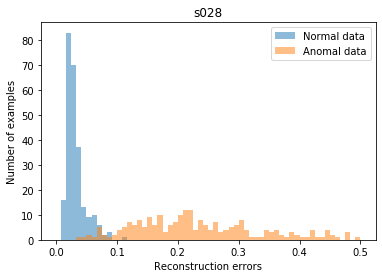

Accuracy = 0.9737903225806451
Specificity(True negative rate) = 0.9715447154471545
Recall(True positive rate) = 0.976
Best threshold: 0.07046979865771812
INFO:tensorflow:Assets written to: subjects\s028\autoencoder\assets


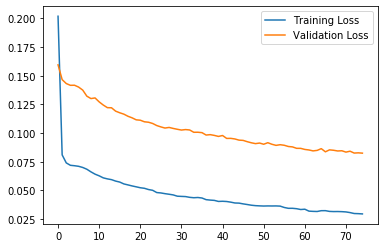

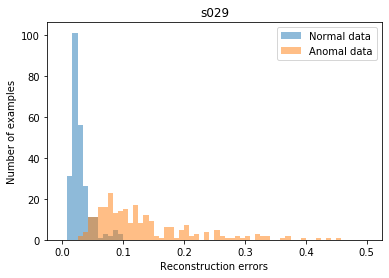

Accuracy = 0.9173387096774194
Specificity(True negative rate) = 0.926829268292683
Recall(True positive rate) = 0.908
Best threshold: 0.0523489932885906
INFO:tensorflow:Assets written to: subjects\s029\autoencoder\assets


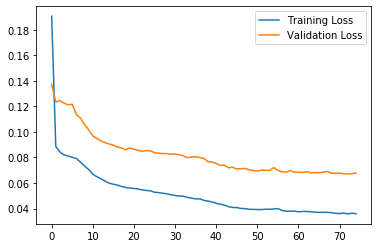

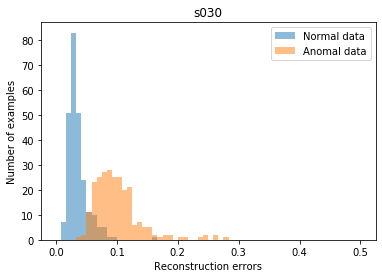

Accuracy = 0.9173387096774194
Specificity(True negative rate) = 0.9227642276422764
Recall(True positive rate) = 0.912
Best threshold: 0.060402684563758385
INFO:tensorflow:Assets written to: subjects\s030\autoencoder\assets


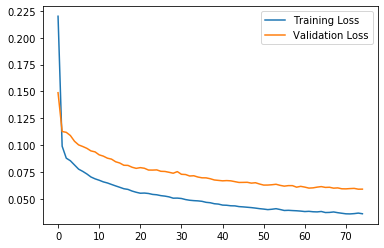

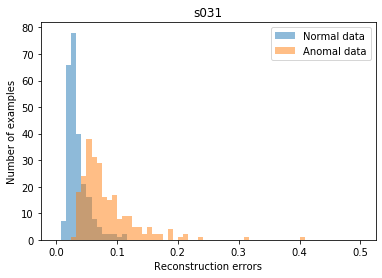

Accuracy = 0.844758064516129
Specificity(True negative rate) = 0.8455284552845529
Recall(True positive rate) = 0.844
Best threshold: 0.0483221476510067
INFO:tensorflow:Assets written to: subjects\s031\autoencoder\assets


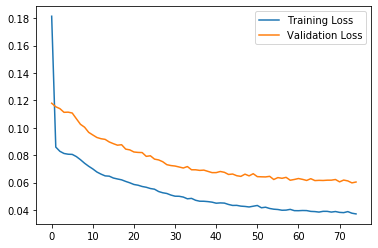

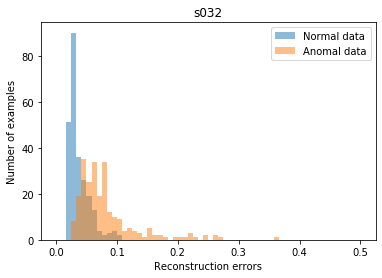

Accuracy = 0.7741935483870968
Specificity(True negative rate) = 0.7682926829268293
Recall(True positive rate) = 0.78
Best threshold: 0.0483221476510067
INFO:tensorflow:Assets written to: subjects\s032\autoencoder\assets


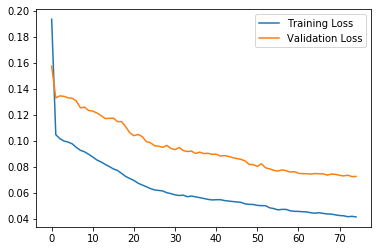

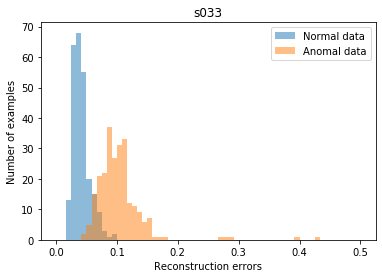

Accuracy = 0.9375
Specificity(True negative rate) = 0.9471544715447154
Recall(True positive rate) = 0.928
Best threshold: 0.06442953020134227
INFO:tensorflow:Assets written to: subjects\s033\autoencoder\assets


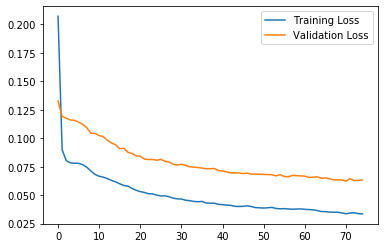

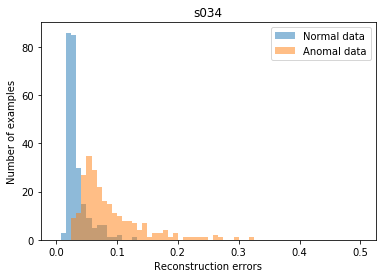

Accuracy = 0.8487903225806451
Specificity(True negative rate) = 0.8455284552845529
Recall(True positive rate) = 0.852
Best threshold: 0.04630872483221476
INFO:tensorflow:Assets written to: subjects\s034\autoencoder\assets


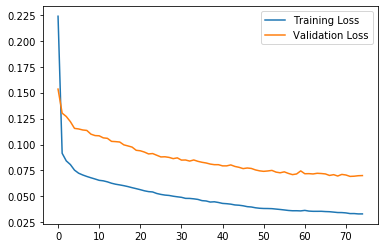

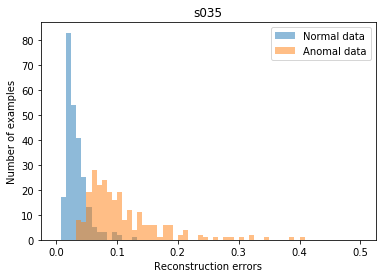

Accuracy = 0.907258064516129
Specificity(True negative rate) = 0.9024390243902439
Recall(True positive rate) = 0.912
Best threshold: 0.054362416107382544
INFO:tensorflow:Assets written to: subjects\s035\autoencoder\assets


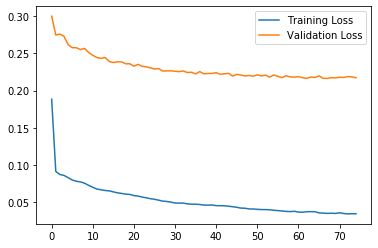

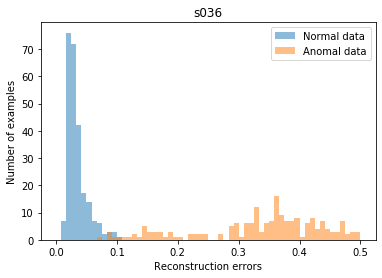

Accuracy = 0.9838709677419355
Specificity(True negative rate) = 0.983739837398374
Recall(True positive rate) = 0.984
Best threshold: 0.09060402684563758
INFO:tensorflow:Assets written to: subjects\s036\autoencoder\assets


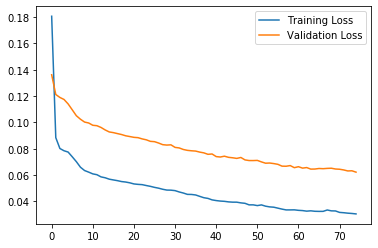

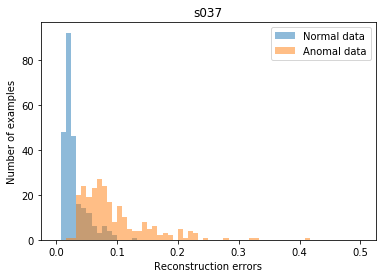

Accuracy = 0.8467741935483871
Specificity(True negative rate) = 0.8414634146341463
Recall(True positive rate) = 0.852
Best threshold: 0.0483221476510067
INFO:tensorflow:Assets written to: subjects\s037\autoencoder\assets


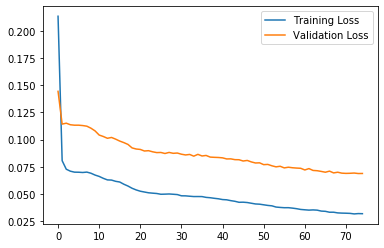

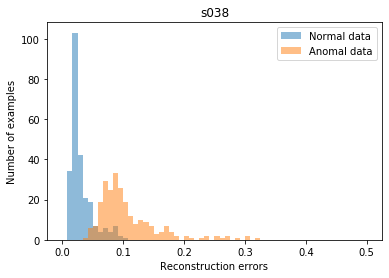

Accuracy = 0.9173387096774194
Specificity(True negative rate) = 0.9227642276422764
Recall(True positive rate) = 0.912
Best threshold: 0.06241610738255033
INFO:tensorflow:Assets written to: subjects\s038\autoencoder\assets


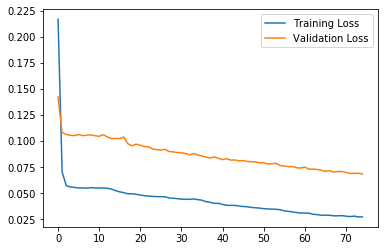

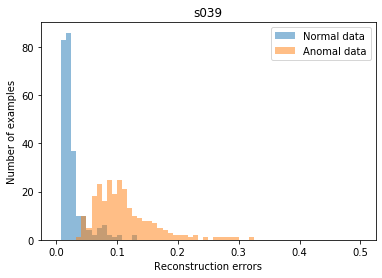

Accuracy = 0.9133064516129032
Specificity(True negative rate) = 0.9065040650406504
Recall(True positive rate) = 0.92
Best threshold: 0.060402684563758385
INFO:tensorflow:Assets written to: subjects\s039\autoencoder\assets


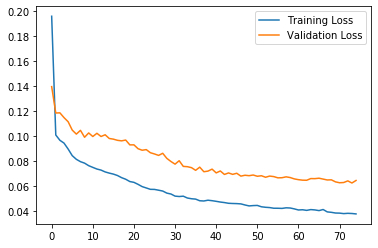

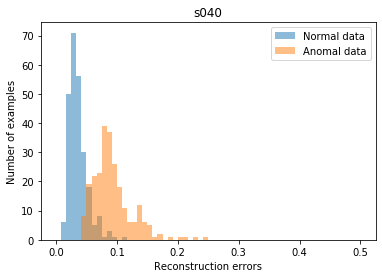

Accuracy = 0.9092741935483871
Specificity(True negative rate) = 0.9105691056910569
Recall(True positive rate) = 0.908
Best threshold: 0.05637583892617449
INFO:tensorflow:Assets written to: subjects\s040\autoencoder\assets


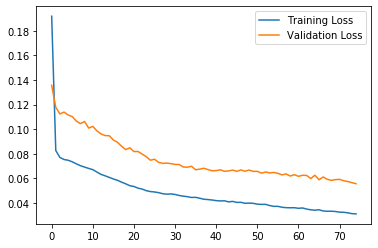

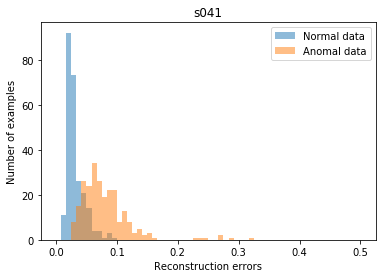

Accuracy = 0.8669354838709677
Specificity(True negative rate) = 0.8699186991869918
Recall(True positive rate) = 0.864
Best threshold: 0.04630872483221476
INFO:tensorflow:Assets written to: subjects\s041\autoencoder\assets


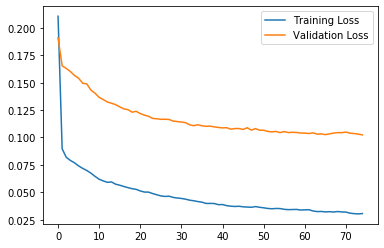

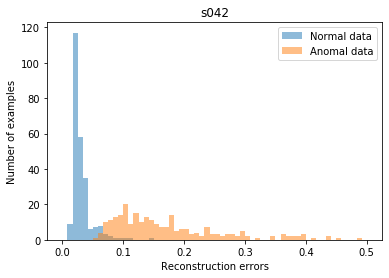

Accuracy = 0.9556451612903226
Specificity(True negative rate) = 0.9512195121951219
Recall(True positive rate) = 0.96
Best threshold: 0.07046979865771812
INFO:tensorflow:Assets written to: subjects\s042\autoencoder\assets


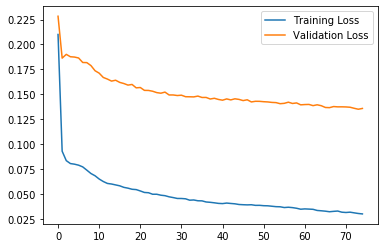

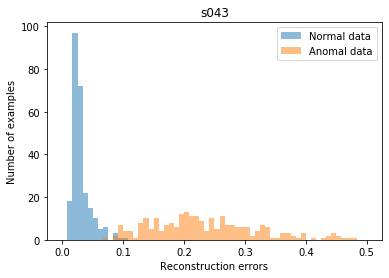

Accuracy = 0.9879032258064516
Specificity(True negative rate) = 0.9878048780487805
Recall(True positive rate) = 0.988
Best threshold: 0.08859060402684563
INFO:tensorflow:Assets written to: subjects\s043\autoencoder\assets


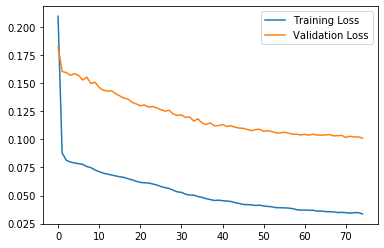

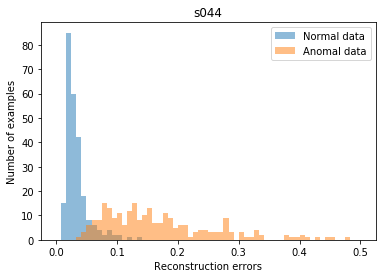

Accuracy = 0.9395161290322581
Specificity(True negative rate) = 0.943089430894309
Recall(True positive rate) = 0.936
Best threshold: 0.06442953020134227
INFO:tensorflow:Assets written to: subjects\s044\autoencoder\assets


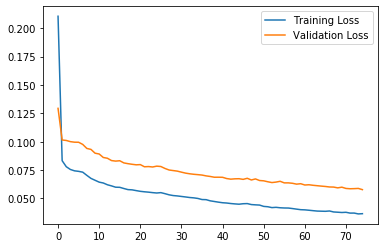

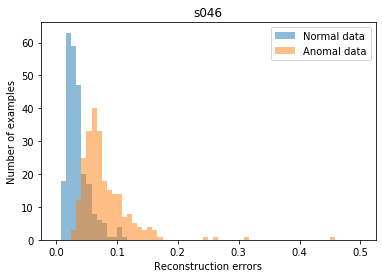

Accuracy = 0.8326612903225806
Specificity(True negative rate) = 0.8333333333333334
Recall(True positive rate) = 0.832
Best threshold: 0.050335570469798654
INFO:tensorflow:Assets written to: subjects\s046\autoencoder\assets


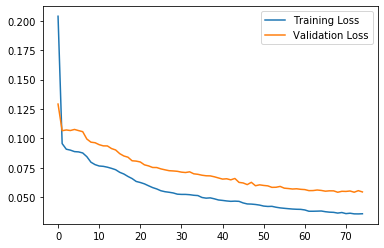

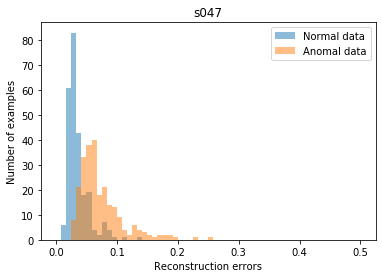

Accuracy = 0.8225806451612904
Specificity(True negative rate) = 0.8170731707317073
Recall(True positive rate) = 0.828
Best threshold: 0.04630872483221476
INFO:tensorflow:Assets written to: subjects\s047\autoencoder\assets


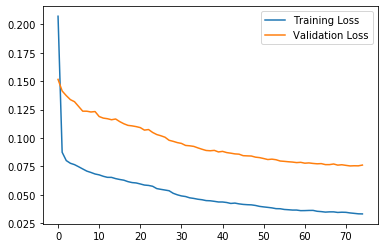

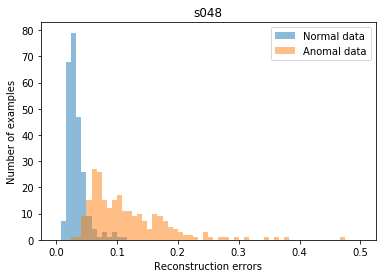

Accuracy = 0.9314516129032258
Specificity(True negative rate) = 0.9349593495934959
Recall(True positive rate) = 0.928
Best threshold: 0.054362416107382544
INFO:tensorflow:Assets written to: subjects\s048\autoencoder\assets


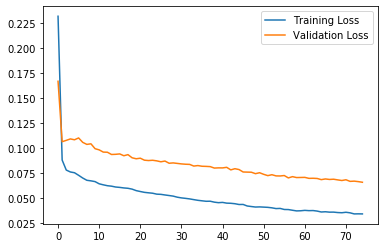

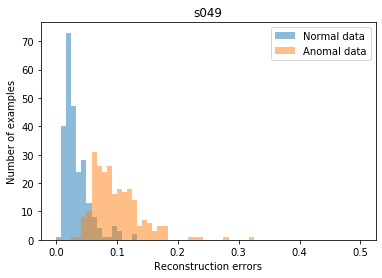

Accuracy = 0.9112903225806451
Specificity(True negative rate) = 0.9186991869918699
Recall(True positive rate) = 0.904
Best threshold: 0.058389261744966434
INFO:tensorflow:Assets written to: subjects\s049\autoencoder\assets


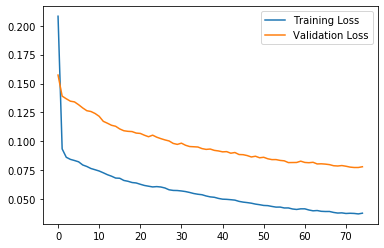

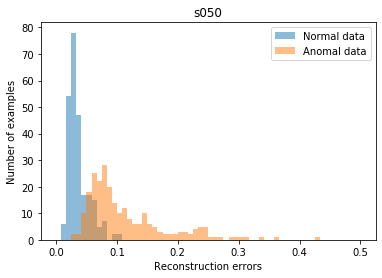

Accuracy = 0.8729838709677419
Specificity(True negative rate) = 0.8699186991869918
Recall(True positive rate) = 0.876
Best threshold: 0.058389261744966434
INFO:tensorflow:Assets written to: subjects\s050\autoencoder\assets


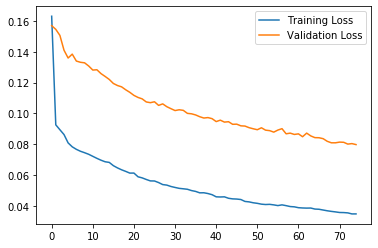

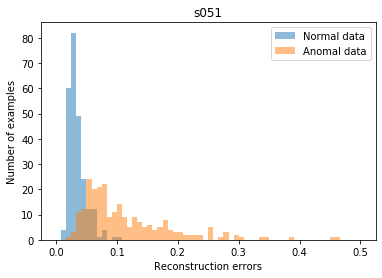

Accuracy = 0.8810483870967742
Specificity(True negative rate) = 0.8861788617886179
Recall(True positive rate) = 0.876
Best threshold: 0.050335570469798654
INFO:tensorflow:Assets written to: subjects\s051\autoencoder\assets


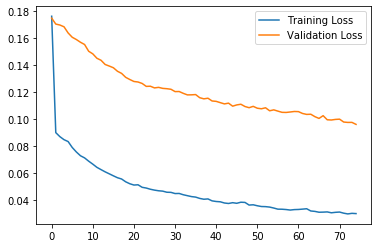

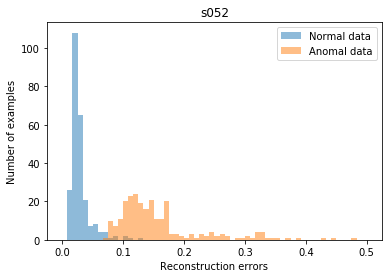

Accuracy = 0.9737903225806451
Specificity(True negative rate) = 0.9715447154471545
Recall(True positive rate) = 0.976
Best threshold: 0.0785234899328859
INFO:tensorflow:Assets written to: subjects\s052\autoencoder\assets


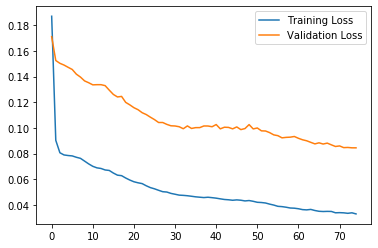

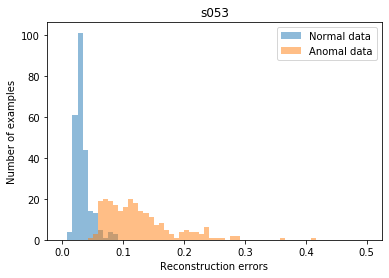

Accuracy = 0.9556451612903226
Specificity(True negative rate) = 0.9552845528455285
Recall(True positive rate) = 0.956
Best threshold: 0.06241610738255033
INFO:tensorflow:Assets written to: subjects\s053\autoencoder\assets


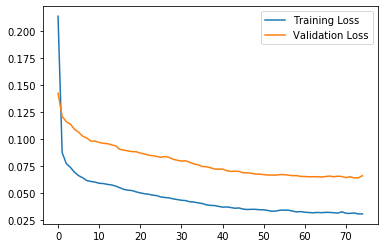

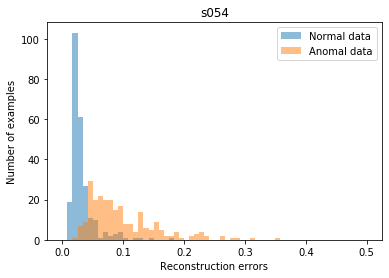

Accuracy = 0.8649193548387096
Specificity(True negative rate) = 0.8617886178861789
Recall(True positive rate) = 0.868
Best threshold: 0.04630872483221476
INFO:tensorflow:Assets written to: subjects\s054\autoencoder\assets


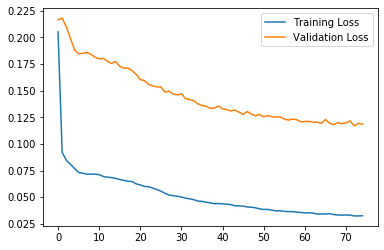

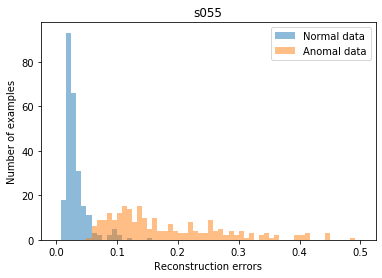

Accuracy = 0.9536290322580645
Specificity(True negative rate) = 0.9512195121951219
Recall(True positive rate) = 0.956
Best threshold: 0.07046979865771812
INFO:tensorflow:Assets written to: subjects\s055\autoencoder\assets


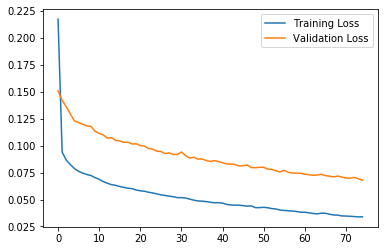

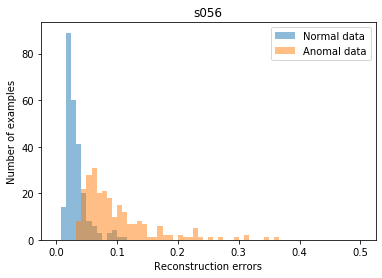

Accuracy = 0.8870967741935484
Specificity(True negative rate) = 0.8902439024390244
Recall(True positive rate) = 0.884
Best threshold: 0.0483221476510067
INFO:tensorflow:Assets written to: subjects\s056\autoencoder\assets


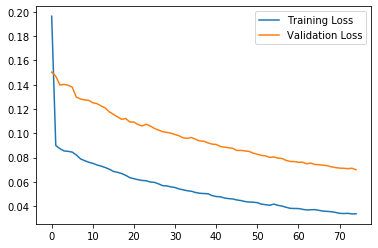

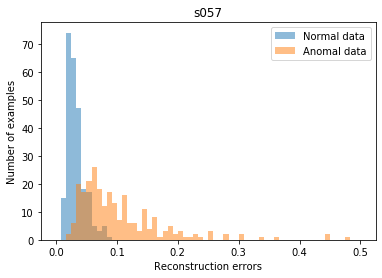

Accuracy = 0.844758064516129
Specificity(True negative rate) = 0.8536585365853658
Recall(True positive rate) = 0.836
Best threshold: 0.04630872483221476
INFO:tensorflow:Assets written to: subjects\s057\autoencoder\assets


In [13]:
subject_list = {}

def train(dataset):
    for subject in dataset["subject"].unique():
        sub_object = train_subject(subject,dataset,250,250,display=True)
        subject_list[subject] = sub_object

train(train_dataset)

# Testing

In [14]:
def test_subject(subject, dataset):
    y_test = dataset["subject"] == subject.name
    x_test = dataset.drop("subject",axis=1)
    x_test_scaled = subject.scaler.transform(x_test)
    preds = predict(subject.autoencoder,x_test_scaled,subject.best_threshold)
    acc,spec,recall = calculate_stats(preds,y_test)
    print("Accuracy = {}".format(acc))
    print("Specificity(True negative rate) = {}".format(spec))
    print("Recall(True positive rate) = {}".format(recall))
    return acc,spec,recall
    
def test(dataset, subject_list):
    acc_list=[]
    spec_list=[]
    recall_list=[]
    for subject in dataset["subject"].unique():
        print("------------------")
        print("Subject:",subject)
        print("------------------")
        acc,spec,recall = test_subject(subject_list[subject],dataset)
        acc_list.append(acc)
        spec_list.append(spec)
        recall_list.append(recall)
    print("------------------")
    print("AVERAGE RESULTS")
    print("------------------")
    print("Accuracy = {}".format(np.array(acc_list).mean()))
    print("Specificity(True negative rate) = {}".format(np.array(spec_list).mean()))
    print("Recall(True positive rate) = {}".format(np.array(recall_list).mean()))

In [15]:
test(test_dataset, subject_list)

------------------
Subject: s038
------------------
Accuracy = 0.8629411764705882
Specificity(True negative rate) = 0.8622
Recall(True positive rate) = 0.9
------------------
Subject: s052
------------------
Accuracy = 0.9825490196078431
Specificity(True negative rate) = 0.983
Recall(True positive rate) = 0.96
------------------
Subject: s040
------------------
Accuracy = 0.9362745098039216
Specificity(True negative rate) = 0.9388
Recall(True positive rate) = 0.81
------------------
Subject: s039
------------------
Accuracy = 0.9060784313725491
Specificity(True negative rate) = 0.9048
Recall(True positive rate) = 0.97
------------------
Subject: s008
------------------
Accuracy = 0.9013725490196078
Specificity(True negative rate) = 0.903
Recall(True positive rate) = 0.82
------------------
Subject: s031
------------------
Accuracy = 0.855686274509804
Specificity(True negative rate) = 0.8586
Recall(True positive rate) = 0.71
------------------
Subject: s057
------------------
Accuracy =

AVERAGE RESULTS (250)
------------------
Specificity(True negative rate) = 0.9078352941176471

Recall(True positive rate) = 0.8509803921568628

AVERAGE RESULTS (100)
------------------
Specificity(True negative rate) = 0.9348313725490197

Recall(True positive rate) = 0.8011764705882353


AVERAGE RESULTS (50)
------------------
Specificity(True negative rate) = 0.9541254901960785

Recall(True positive rate) = 0.7537254901960784